In [2]:
import pandas as pd
import numpy as np

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [8]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [ ]:
# 

In [10]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
te_array  # 상품 종류가 6개 , 구매 데이터가 8건

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [11]:
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [12]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [13]:
te_df = pd.DataFrame(te_array,columns = te.columns_)
te_df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [14]:
dataset = [['사과','치즈','생수'],
          ['생수','딸기','치즈','고등어'],
          ['수박','사과','생수'],
          ['생수','딸기','치즈','감자']]

In [16]:
te = TransactionEncoder()
te_array = te.fit_transform(dataset)
te_df = pd.DataFrame(te_array,columns=te.columns_)
te_df

,감자,고등어,딸기,사과,생수,수박,치즈
0,False,False,False,True,True,False,True
1,False,True,True,False,True,False,True
2,False,False,False,True,True,True,False
3,True,False,True,False,True,False,True


In [18]:
apriori(te_df)

,support,itemsets
0,0.50,(2)
1,0.50,(3)
2,1.00,(4)
3,0.75,(6)
4,0.50,"(2, 4)"
5,0.50,"(2, 6)"
6,0.50,"(3, 4)"
7,0.75,"(4, 6)"
8,0.50,"(2, 4, 6)"


In [20]:
freq_items = apriori(te_df,min_support=0.75,use_colnames=True)
freq_items

,support,itemsets
0,1.00,(생수)
1,0.75,(치즈)
2,0.75,"(치즈, 생수)"


In [26]:
from mlxtend.frequent_patterns import association_rules 
association_rules(freq_items,metric='confidence',min_threshold=0.3)
# 구글 코랩도 사용하기 좋다 ( 무료 )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(치즈),(생수),0.75,1.00,0.75,1.00,1.0,0.0,inf
1,(생수),(치즈),1.00,0.75,0.75,0.75,1.0,0.0,1.0


# 오후

In [27]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


In [28]:
te=TransactionEncoder()
te_array = te.fit_transform(dataset)
te_df = pd.DataFrame(te_array,columns=te.columns_)
te_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [29]:
# 최소 지지도가 0.6 이상인 항목집합을 추출
freq_itemset = apriori(te_df,min_support=0.6,use_colnames=True)
freq_itemset

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Yogurt)"


In [37]:
freq_itemset['length'] = freq_itemset.itemsets.apply(len)
freq_itemset

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Kidney Beans, Milk)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Kidney Beans, Yogurt)",2


In [44]:
# length가 2면서 지지도가 0.8 이상인 항목집합 추출

freq_itemset[(freq_itemset['support']>=0.8)&(freq_itemset['length']==2)]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [47]:
# sparse 형태 표현으로 메모리 절약

ohtArray = te.fit(dataset).transform(dataset,sparse=True)
ohtArray

<5x11 sparse matrix of type '<class 'numpy.bool_'>'
	with 26 stored elements in Compressed Sparse Row format>

In [49]:
sparsedf = pd.DataFrame.sparse.from_spmatrix(ohtArray,columns=te.columns_)
sparsedf

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


__Conviction__  
* 표기 : conv(X->Y)
* 계산 : (1-s(Y))  / (1-c(X->Y))  
* 의미 : Y없이 X가 발생한 비율 (찾아낸 association rule 이 얼마나 잘못되었는지 확인 용도)  
* 결과 수치 : 크면 클 수록 연관이 높음을 확인할 수 있음

In [51]:
data = pd.read_csv('d:/downloads/Market_Basket_Optimisation.csv',header=None)
data.shape

(7501, 20)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [53]:
plt.rcParams['figure.figsize']=(15,15)

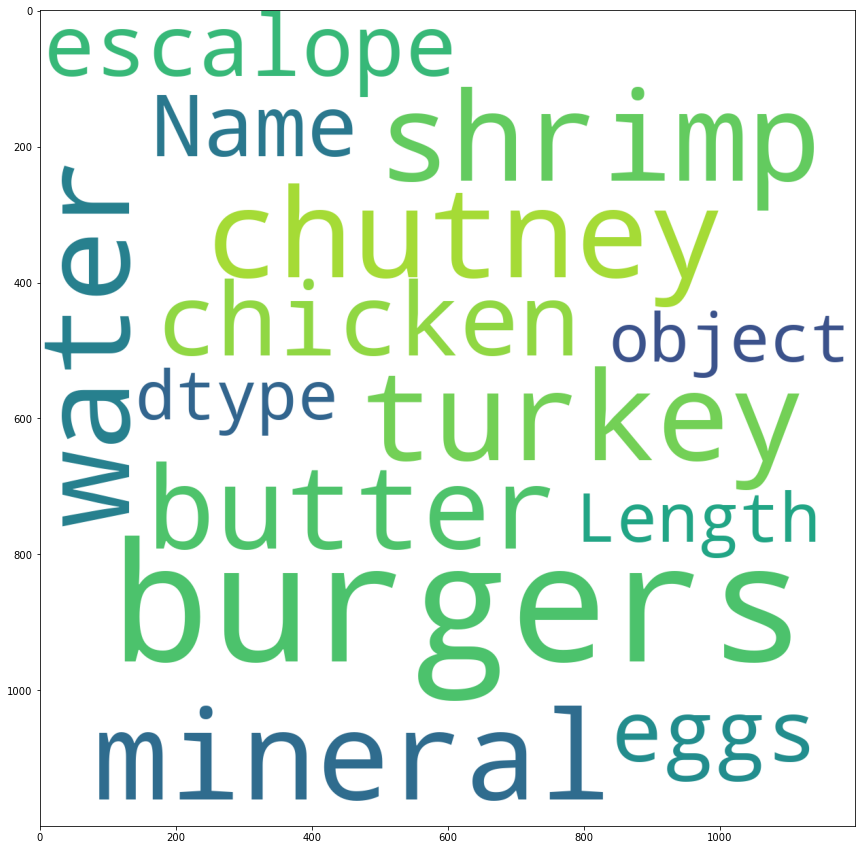

In [54]:
word_cloud = WordCloud(background_color='white',
                       width=1200,height=1200,
                       max_words=120).generate(str(data[0]))
plt.imshow(word_cloud)

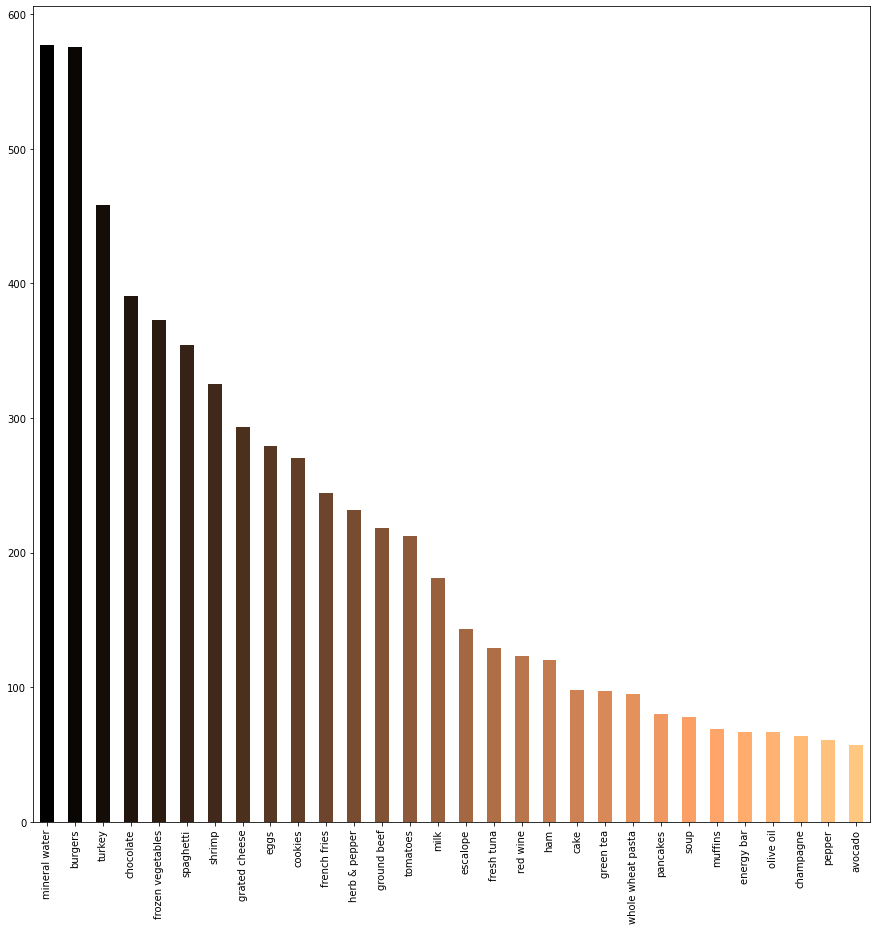

In [57]:
data[0].value_counts().head(30).plot.bar(color=plt.cm.copper(np.linspace(0,1,30)))